#  Corona vaccine progress 
version 0.91 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Argentina,ARG,Sputnik V,2021-01-08,Government of Argentina,https://www.argentina.gob.ar/noticias/ya-se-ap...
1,Austria,AUT,Pfizer/BioNTech,2020-12-30,Ministry of Health,https://web.archive.org/web/20210104171732/htt...
2,Bahrain,BHR,Sinopharm,2021-01-09,Ministry of Health,https://twitter.com/MOH_Bahrain/status/1347998...
3,Belgium,BEL,Pfizer/BioNTech,2021-01-07,Government vaccination taskforce,https://www.lalibre.be/belgique/societe/vaccin...
4,Bulgaria,BGR,Pfizer/BioNTech,2021-01-10,Ministry of Health,https://coronavirus.bg/bg/statistika
5,Canada,CAN,"Moderna, Pfizer/BioNTech",2021-01-08,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada
6,Chile,CHL,Pfizer/BioNTech,2021-01-06,Department of Statistics and Health Information,https://deis.minsal.cl/
7,China,CHN,"CNBG, Sinovac",2021-01-09,National Health Commission,http://www.scio.gov.cn/xwfbh/xwbfbh/wqfbh/4468...
8,Costa Rica,CRI,Pfizer/BioNTech,2021-01-08,National Health Commission,https://www.larepublica.net/noticia/caja-repor...
9,Croatia,HRV,Pfizer/BioNTech,2021-01-08,Ministry of Health,https://vlada.gov.hr/vijesti/epidemioloske-mje...


In [5]:
#order by last updated ascending
countries_csv.sort_values(by=['last_observation_date'])

,location,iso_code,vaccines,last_observation_date,source_name,source_website
25,Kuwait,KWT,Pfizer/BioNTech,2020-12-28,Ministry of Health,https://alqabas.com/article/5828928-2500-شخص-ح...
28,Luxembourg,LUX,Pfizer/BioNTech,2020-12-30,Government of Luxembourg,https://covid19.public.lu/fr/actualite-covid-1...
1,Austria,AUT,Pfizer/BioNTech,2020-12-30,Ministry of Health,https://web.archive.org/web/20210104171732/htt...
21,Iceland,ISL,Pfizer/BioNTech,2020-12-30,Directorate of Health,https://www.ruv.is/frett/2020/12/30/4875-lands...
19,Guinea,GIN,Sputnik V,2020-12-30,National Health Security Agency,https://apnews.com/article/cabinets-health-gui...
38,Russia,RUS,Sputnik V,2021-01-02,Government of Russia,https://tass.com/society/1241979
32,Northern Ireland,NaN,Pfizer/BioNTech,2021-01-03,Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
29,Malta,MLT,Pfizer/BioNTech,2021-01-03,Ministry of Health,https://timesofmalta.com/articles/view/1400-re...
40,Scotland,NaN,Pfizer/BioNTech,2021-01-03,Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
48,Wales,NaN,Pfizer/BioNTech,2021-01-03,Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


## Latest reported

In [6]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:25]

,location,date,vaccine,total_vaccinations,source_url,iso_code,vaccines,last_observation_date,source_name,source_website,_merge
32,Bulgaria,2021-01-10,Pfizer/BioNTech,13473,https://coronavirus.bg/bg/statistika,BGR,Pfizer/BioNTech,2021-01-10,Ministry of Health,https://coronavirus.bg/bg/statistika,both
305,United Arab Emirates,2021-01-10,Sinopharm,1020349,http://covid19.ncema.gov.ae/en,ARE,Sinopharm,2021-01-10,National Emergency Crisis and Disaster Managem...,https://covid19.ncema.gov.ae/en,both
31,Bulgaria,2021-01-09,Pfizer/BioNTech,13355,https://coronavirus.bg/bg/statistika,BGR,Pfizer/BioNTech,2021-01-10,Ministry of Health,https://coronavirus.bg/bg/statistika,both
22,Bahrain,2021-01-09,Sinopharm,84157,https://twitter.com/MOH_Bahrain/status/1347998...,BHR,Sinopharm,2021-01-09,Ministry of Health,https://twitter.com/MOH_Bahrain/status/1347998...,both
279,Romania,2021-01-09,Pfizer/BioNTech,102301,https://vaccinare-covid.gov.ro/actualizare-zil...,ROU,Pfizer/BioNTech,2021-01-09,Government of Romania,https://vaccinare-covid.gov.ro/comunicate-ofic...,both
68,China,2021-01-09,"CNBG, Sinovac",9000000,http://www.scio.gov.cn/xwfbh/xwbfbh/wqfbh/4468...,CHN,"CNBG, Sinovac",2021-01-09,National Health Commission,http://www.scio.gov.cn/xwfbh/xwbfbh/wqfbh/4468...,both
142,Greece,2021-01-09,Pfizer/BioNTech,40163,https://www.data.gov.gr/datasets/mdg_emvolio/,GRC,Pfizer/BioNTech,2021-01-09,Ministry of Health,https://www.data.gov.gr/datasets/mdg_emvolio/,both
199,Latvia,2021-01-09,Pfizer/BioNTech,6583,https://data.gov.lv/dati/eng/dataset/covid19-v...,LVA,Pfizer/BioNTech,2021-01-09,National Health Service,http://www.vmnvd.gov.lv/lv/covid-19/1486-vakci...,both
189,Italy,2021-01-09,Pfizer/BioNTech,583050,https://github.com/italia/covid19-opendata-vac...,ITA,Pfizer/BioNTech,2021-01-09,Extraordinary commissioner for the Covid-19 em...,https://github.com/italia/covid19-opendata-vac...,both
226,Netherlands,2021-01-09,Pfizer/BioNTech,30000,https://www.zeelandnet.nl/nieuws/inmiddels-300...,NLD,Pfizer/BioNTech,2021-01-09,National Institute for Public Health and the E...,https://www.zeelandnet.nl/nieuws/inmiddels-300...,both


In [7]:
#Countries in list
allCountries["location"].value_counts()

Canada                  26
Israel                  19
Bahrain                 18
Italy                   14
Germany                 13
Romania                 13
Greece                  13
Denmark                 13
United States           12
Estonia                 12
Oman                    11
Lithuania               11
Mexico                  10
Poland                  10
Hungary                  9
Norway                   9
Latvia                   9
Bulgaria                 8
Chile                    7
Slovenia                 6
Portugal                 6
Finland                  5
Croatia                  5
Wales                    4
France                   4
Scotland                 4
Northern Ireland         4
United Arab Emirates     4
Argentina                4
Spain                    4
Netherlands              4
Ireland                  3
England                  3
China                    3
Costa Rica               3
Russia                   3
United Kingdom           3
S

In [8]:
allCountries.groupby(["location", "vaccine"]).size()

location              vaccine                 
Argentina             Sputnik V                    4
Austria               Pfizer/BioNTech              1
Bahrain               Sinopharm                   18
Belgium               Pfizer/BioNTech              2
Bulgaria              Pfizer/BioNTech              8
Canada                Moderna, Pfizer/BioNTech     9
                      Pfizer/BioNTech             17
Chile                 Pfizer/BioNTech              7
China                 CNBG, Sinovac                3
Costa Rica            Pfizer/BioNTech              3
Croatia               Pfizer/BioNTech              5
Cyprus                Pfizer/BioNTech              1
Czechia               Pfizer/BioNTech              2
Denmark               Pfizer/BioNTech             13
England               Pfizer/BioNTech              3
Estonia               Pfizer/BioNTech             12
Finland               Pfizer/BioNTech              5
France                Pfizer/BioNTech              4

In [9]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 320
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               310 non-null    object        
 1   date                   310 non-null    datetime64[ns]
 2   vaccine                310 non-null    object        
 3   total_vaccinations     310 non-null    int64         
 4   source_url             310 non-null    object        
 5   iso_code               310 non-null    object        
 6   vaccines               310 non-null    object        
 7   last_observation_date  310 non-null    object        
 8   source_name            310 non-null    object        
 9   source_website         310 non-null    object        
 10  _merge                 310 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 27.0+ KB


In [10]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape)


23 497 169 (45, 3)


## Charts

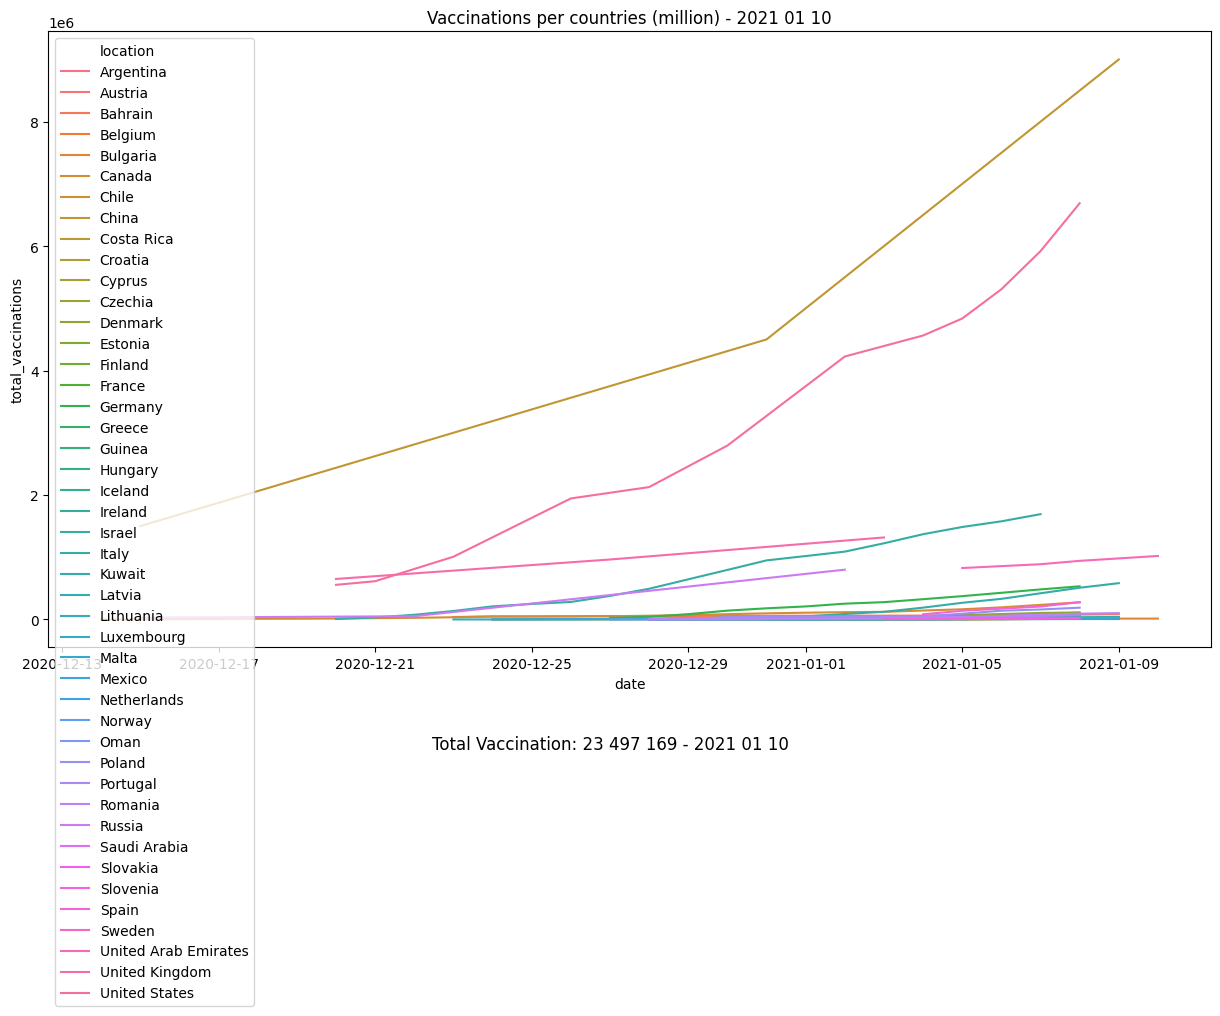

In [11]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str  + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


In [12]:
allCountriesFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 320
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               310 non-null    object        
 1   date                   310 non-null    datetime64[ns]
 2   vaccine                310 non-null    object        
 3   total_vaccinations     310 non-null    int64         
 4   source_url             310 non-null    object        
 5   iso_code               310 non-null    object        
 6   vaccines               310 non-null    object        
 7   last_observation_date  310 non-null    object        
 8   source_name            310 non-null    object        
 9   source_website         310 non-null    object        
 10  _merge                 310 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 27.0+ KB


In [13]:
# Resample dates Forward filling and sum

#allCountriesFiltered
#grouper = allCountriesFiltered.groupby([pd.Grouper(key="date",freq='1D'), 'location']).mean() 


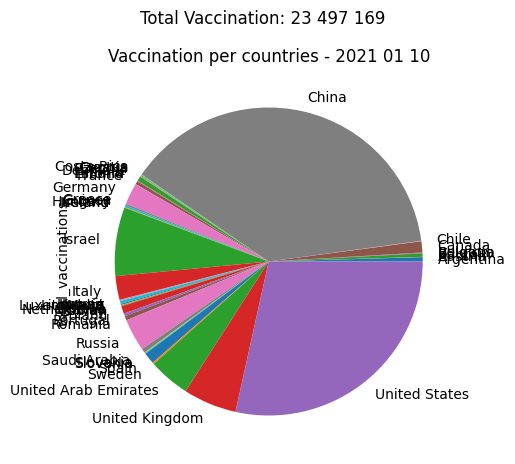

In [14]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [15]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,vaccine,iso_code
location,,,
China,9000000,"CNBG, Sinovac",CHN
United States,6688231,"Moderna, Pfizer/BioNTech",USA
Israel,1692000,Pfizer/BioNTech,ISR
United Kingdom,1317745,Pfizer/BioNTech,GBR
United Arab Emirates,1020349,Sinopharm,ARE
Russia,800000,Sputnik V,RUS
Italy,583050,Pfizer/BioNTech,ITA
Germany,532878,Pfizer/BioNTech,DEU
Spain,277976,Pfizer/BioNTech,ESP


In [16]:
plotLatestCountries.shape

(45, 3)

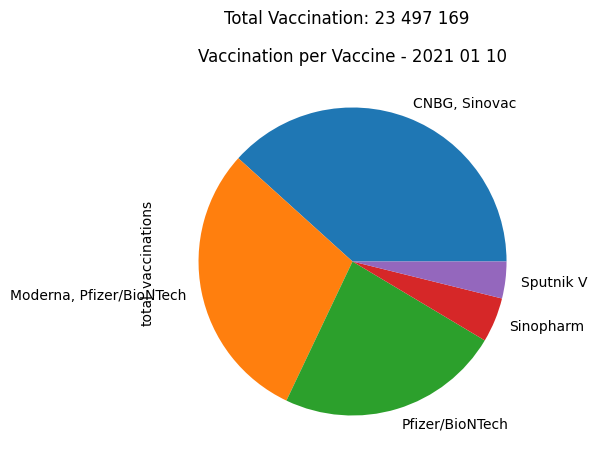

In [17]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [18]:
plotVaccine.sort_values(ascending=True)

vaccine
Sputnik V                    907567
Sinopharm                   1104506
Pfizer/BioNTech             5521192
Moderna, Pfizer/BioNTech    6963904
CNBG, Sinovac               9000000
Name: total_vaccinations, dtype: int64

In [19]:
# Sweden have 10 000 doses....
#allCountries

In [20]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-10 10:23:07.889681
Time elapsed (hh:mm:ss.ms) 0:00:15.115181


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [21]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sp8
# see also https://www.wikidata.org/wiki/Wikidata:Project_chat#Brexit_in_Wikidata
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita
?G20 ?IMF (sample(?genderH) AS ?genderH)
WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1 }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita }
  ?cid wdt:P6/wdt:P21 ?gHead # gender head of gov
  BIND (exists{?cid wdt:P463 wd:Q458} && not exists{?cid p:P463 [ ps:P463 wd:Q458 ; pq:P582 [] ]} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q19771} && not exists{?cid p:P463 [ ps:P463 wd:Q19771 ; pq:P582 [] ]} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q7804} && not exists{?cid p:P463 [ ps:P463 wd:Q7804 ; pq:P582 [] ]} AS ?IMF)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
    ?gHead rdfs:label ?genderH.
    FILTER((LANG(?genderH)) = "en")

  }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid 
 ?G20 ?IMF """


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cid                  194 non-null    object
 1   continent            194 non-null    object
 2   memberEU             194 non-null    object
 3   country              194 non-null    object
 4   qid                  194 non-null    object
 5   population           194 non-null    object
 6   ISO3166_1            194 non-null    object
 7   nominalGDPperCapita  191 non-null    object
 8   G20                  194 non-null    object
 9   IMF                  194 non-null    object
 10  genderH              194 non-null    object
dtypes: object(11)
memory usage: 16.8+ KB


In [22]:
WDpopulation.sample(5)

,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH
38,http://www.wikidata.org/entity/Q1050,Africa,false,Eswatini,Q1050,1124753,SWZ,3242,false,false,male
68,http://www.wikidata.org/entity/Q948,Africa,false,Tunisia,Q948,11565204,TUN,3464,false,true,male
76,http://www.wikidata.org/entity/Q836,Asia,false,Myanmar,Q836,53370609,MMR,1256,false,false,female
9,http://www.wikidata.org/entity/Q31,Europe,true,Belgium,Q31,11431406,BEL,43467,false,false,male
88,http://www.wikidata.org/entity/Q1049,Africa,false,Sudan,Q1049,40533330,SDN,2898,false,false,male


In [23]:
plotLatestCountries

,total_vaccinations,vaccine,iso_code
location,,,
Argentina,107542,Sputnik V,ARG
Austria,6000,Pfizer/BioNTech,AUT
Bahrain,84157,Sinopharm,BHR
Belgium,8000,Pfizer/BioNTech,BEL
Bulgaria,13473,Pfizer/BioNTech,BGR
Canada,275673,"Moderna, Pfizer/BioNTech",CAN
Chile,10689,Pfizer/BioNTech,CHL
China,9000000,"CNBG, Sinovac",CHN
Costa Rica,9751,Pfizer/BioNTech,CRI


In [24]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,vaccine,iso_code,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH,_merge
0,107542,Sputnik V,ARG,http://www.wikidata.org/entity/Q414,South America,false,Argentina,Q414,44938712,ARG,14398,true,false,male,both
1,6000,Pfizer/BioNTech,AUT,http://www.wikidata.org/entity/Q40,Europe,true,Austria,Q40,8809212,AUT,44920,false,false,male,both
2,84157,Sinopharm,BHR,http://www.wikidata.org/entity/Q398,Asia,false,Bahrain,Q398,1492584,BHR,23739,false,false,male,both
3,8000,Pfizer/BioNTech,BEL,http://www.wikidata.org/entity/Q31,Europe,true,Belgium,Q31,11431406,BEL,43467,false,false,male,both
4,13473,Pfizer/BioNTech,BGR,http://www.wikidata.org/entity/Q219,Europe,true,Bulgaria,Q219,7000039,BGR,8228,false,false,male,both
5,275673,"Moderna, Pfizer/BioNTech",CAN,http://www.wikidata.org/entity/Q16,North America,false,Canada,Q16,37894799,CAN,44870,true,false,male,both
6,10689,Pfizer/BioNTech,CHL,http://www.wikidata.org/entity/Q298,South America,false,Chile,Q298,18054726,CHL,15346,false,false,male,both
7,9000000,"CNBG, Sinovac",CHN,http://www.wikidata.org/entity/Q148,Asia,false,People's Republic of China,Q148,1409517397,CHN,8826,true,false,male,both
8,9751,Pfizer/BioNTech,CRI,http://www.wikidata.org/entity/Q800,North America,false,Costa Rica,Q800,4905769,CRI,11677,false,false,male,both
9,24985,Pfizer/BioNTech,HRV,http://www.wikidata.org/entity/Q224,Europe,true,Croatia,Q224,4105493,HRV,13386,false,false,male,both


In [25]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
# G20 IMF
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)
CountriesData['genderFlag'] = CountriesData['genderH']
CountriesData["genderFlag"].replace({"male": "1", "female": "0"}, inplace=True)
CountriesData['genderFlag'] = CountriesData['genderFlag'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   total_vaccinations   45 non-null     int64   
 1   vaccine              45 non-null     object  
 2   iso_code             45 non-null     object  
 3   cid                  45 non-null     object  
 4   continent            45 non-null     object  
 5   memberEU             45 non-null     int64   
 6   country              45 non-null     object  
 7   qid                  45 non-null     object  
 8   population           45 non-null     int64   
 9   ISO3166_1            45 non-null     object  
 10  nominalGDPperCapita  44 non-null     float64 
 11  G20                  45 non-null     int64   
 12  IMF                  45 non-null     int64   
 13  genderH              45 non-null     object  
 14  _merge               45 non-null     category
 15  genderFlag           45 n

In [26]:
#CountriesData

In [27]:
CountriesData['Country'] = CountriesData.index

In [28]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.327316
population                         0.890670
nominalGDPperCapita                0.013738
G20                                0.436107
IMF                               -0.014234
genderFlag                         0.097106
Country                            0.072882
vaccinations_population_percent    0.162388
Name: total_vaccinations, dtype: float64

In [29]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.162388
memberEU                          -0.305194
population                        -0.036399
nominalGDPperCapita                0.123307
G20                               -0.092934
IMF                               -0.048043
genderFlag                         0.048560
Country                            0.102867
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [30]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


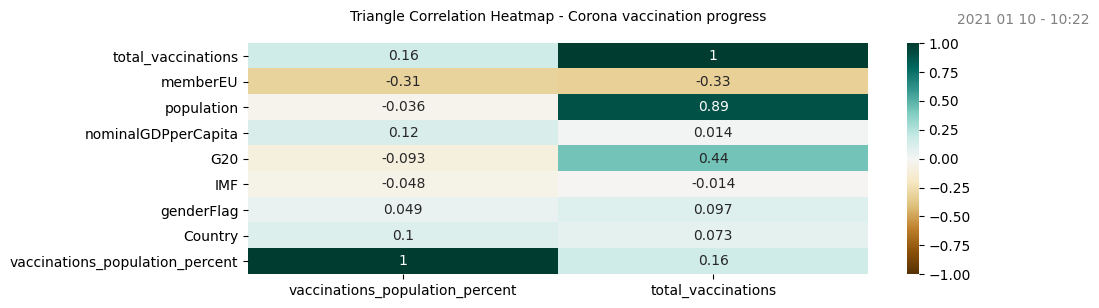

In [31]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [32]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G20","IMF","country"}]

,vaccinations_population_percent,memberEU,population,country,G20,total_vaccinations,continent,IMF
22,18.607720,0,9093000,Israel,0,1692000,Asia,0
42,10.854609,0,9400145,United Arab Emirates,0,1020349,Asia,0
2,5.638343,0,1492584,Bahrain,0,84157,Asia,0
44,2.037607,0,328239523,United States of America,1,6688231,North America,0
43,1.995910,0,66022273,United Kingdom,1,1317745,Europe,0
12,1.929261,1,5827463,Denmark,0,112427,Europe,0
20,1.365355,0,357050,Iceland,0,4875,Europe,0
23,0.966643,1,60317000,Italy,1,583050,Europe,1
39,0.944564,1,2066880,Slovenia,0,19523,Europe,0
26,0.795136,1,2790842,Lithuania,0,22191,Europe,0


## Vaccination numbers % of population

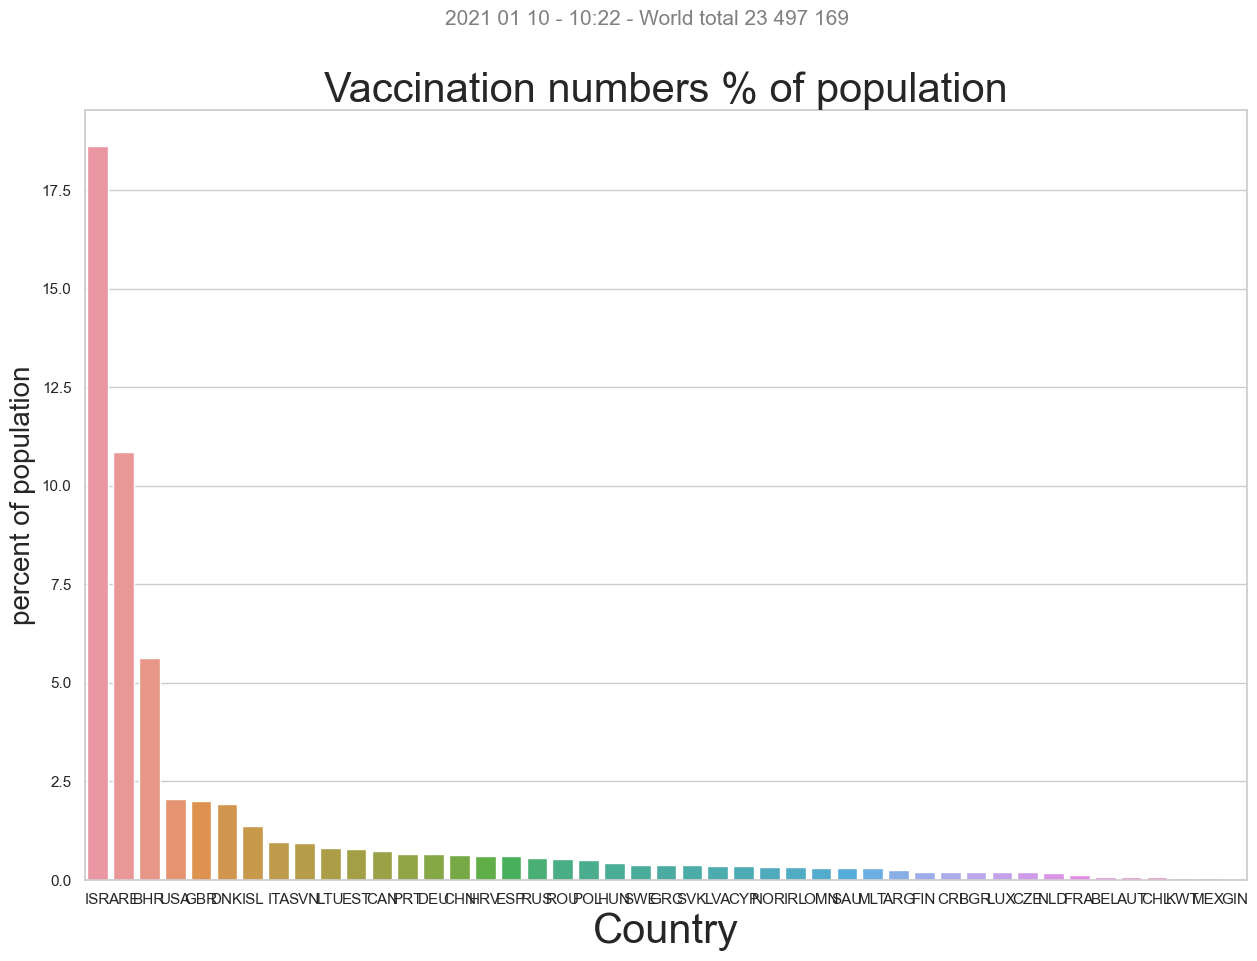

In [33]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

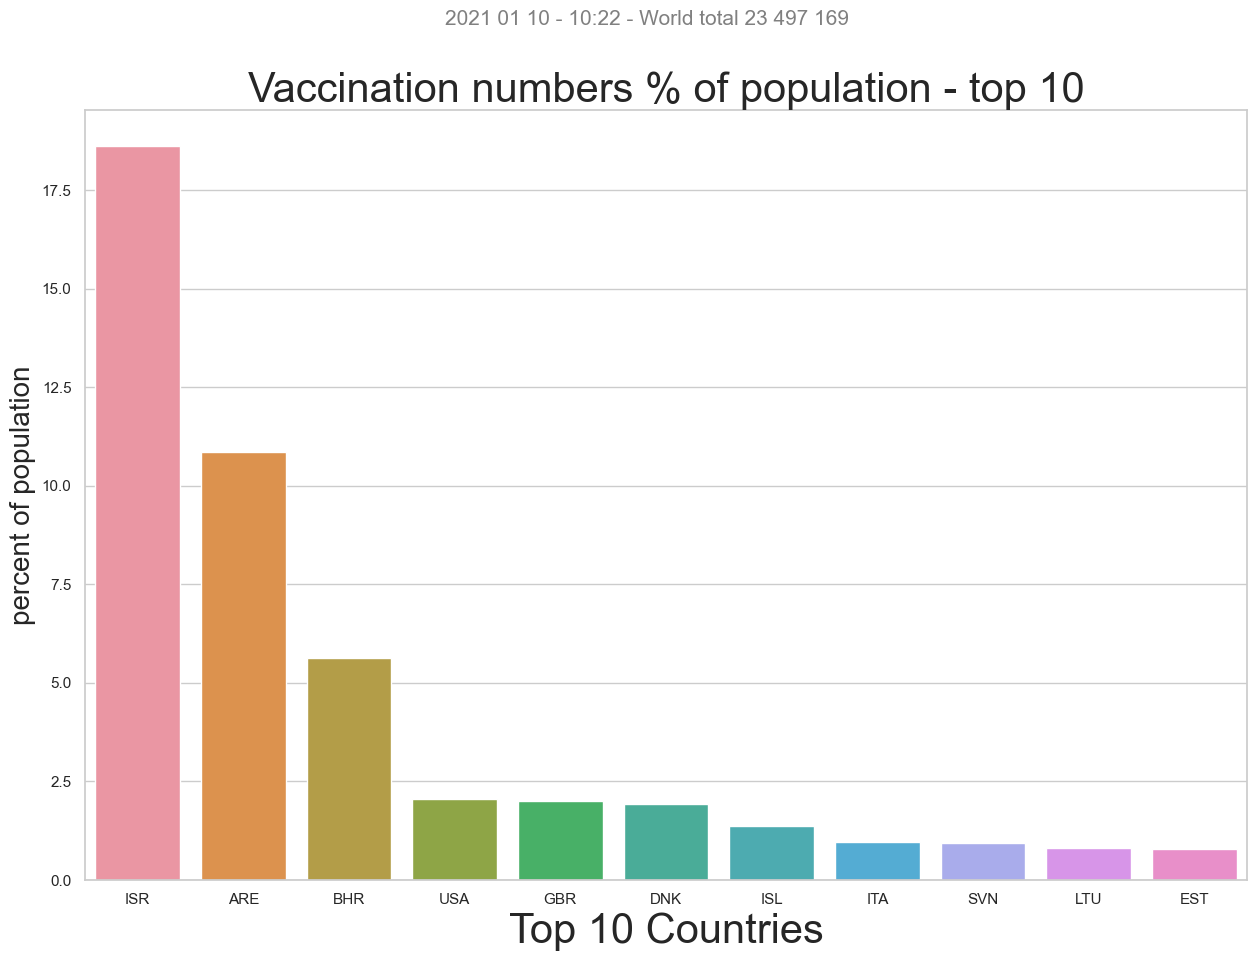

In [34]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:11]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

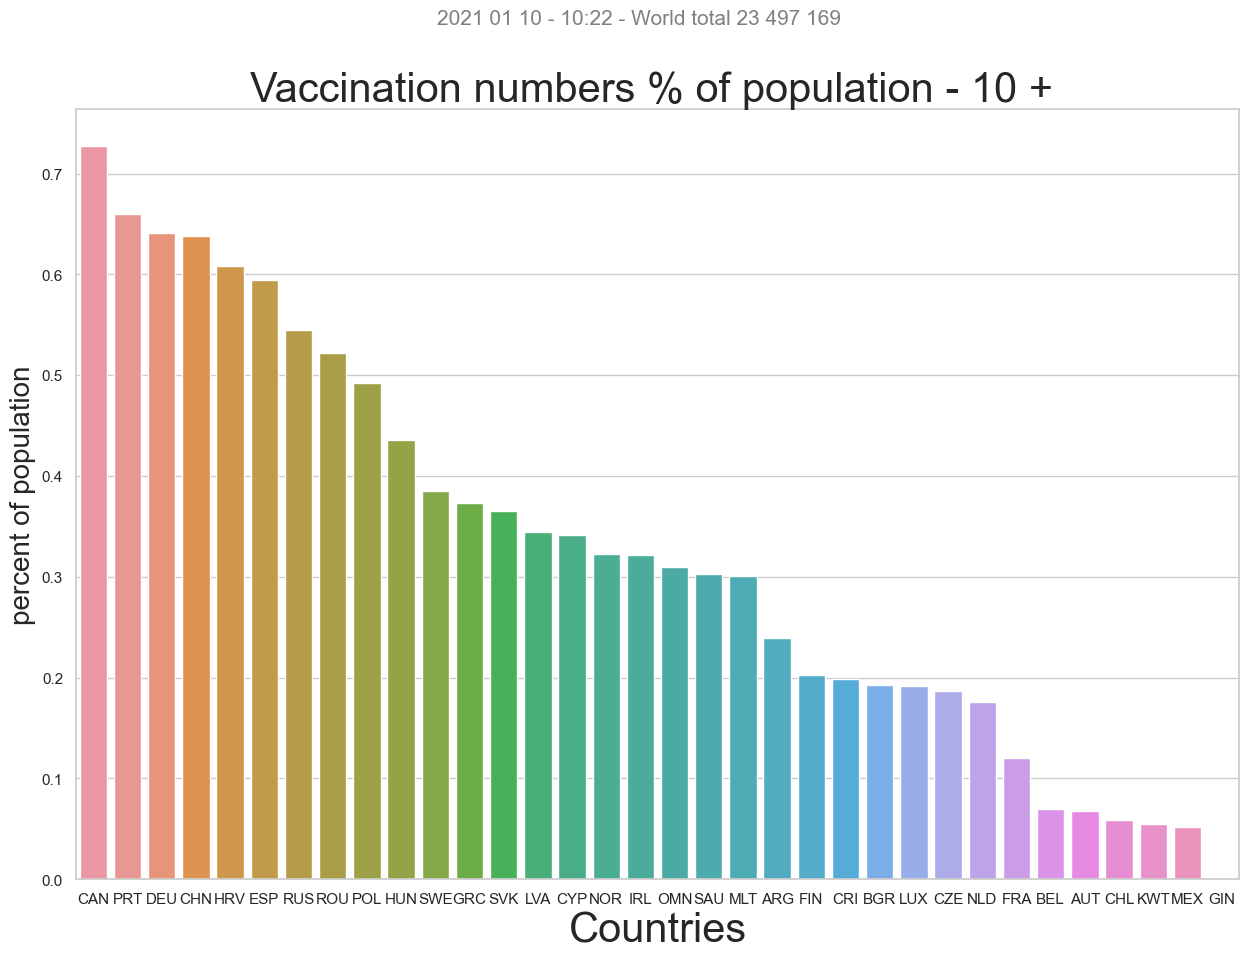

In [35]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[11:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

## Scatter plots

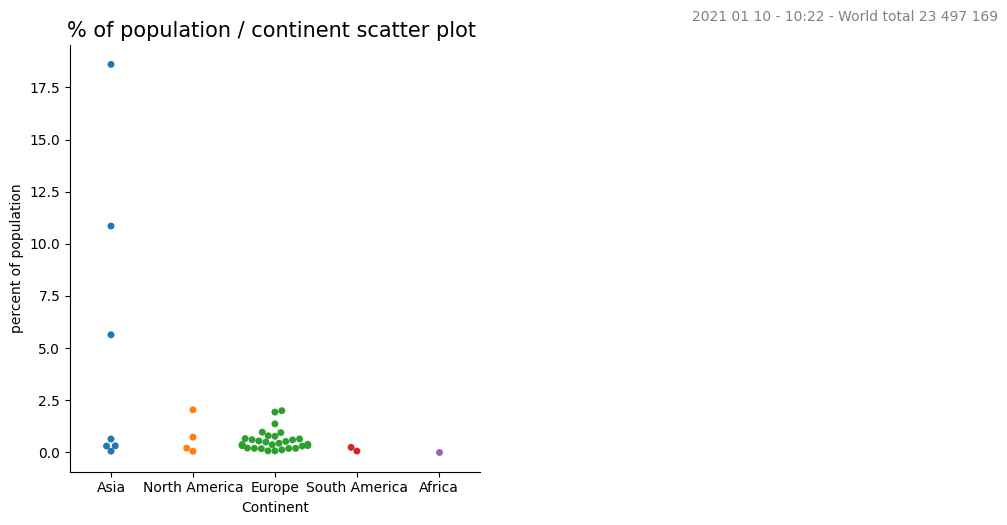

In [36]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

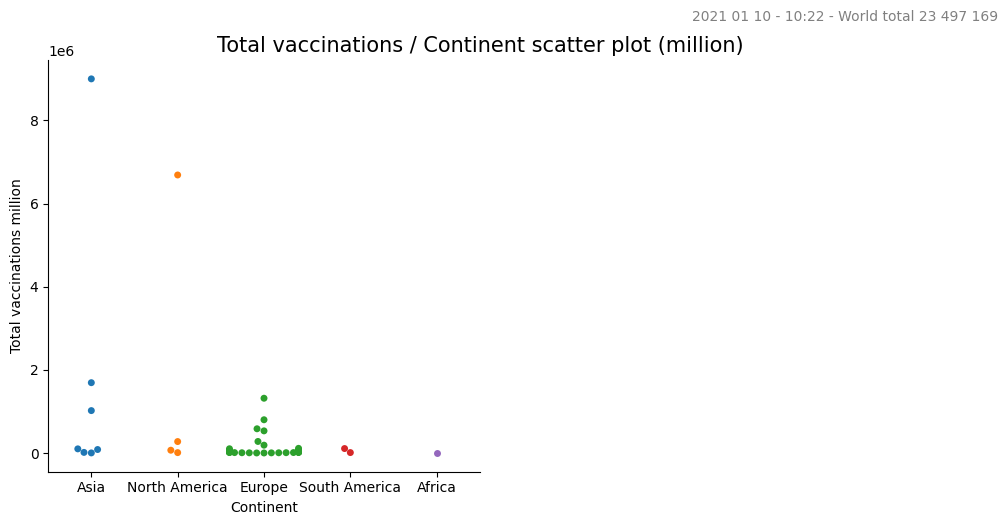

In [37]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [38]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

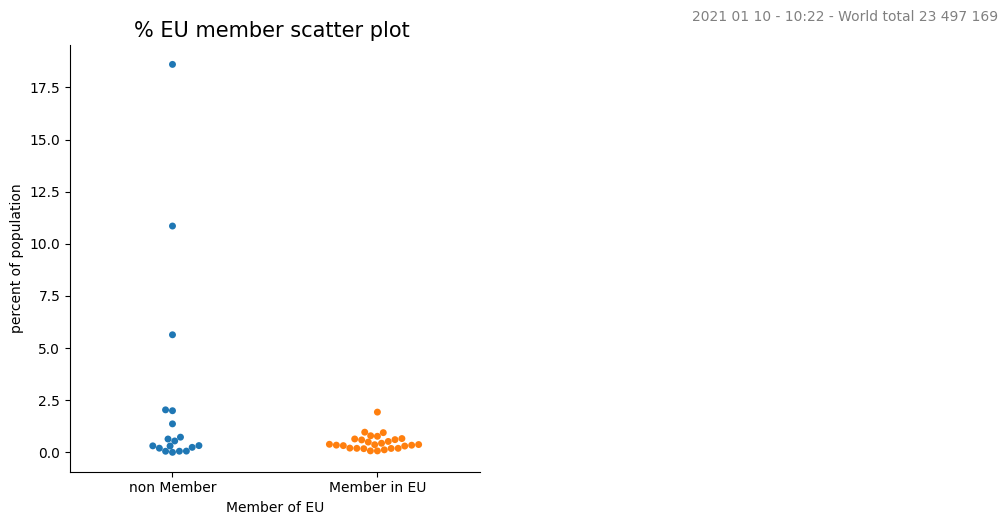

In [39]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

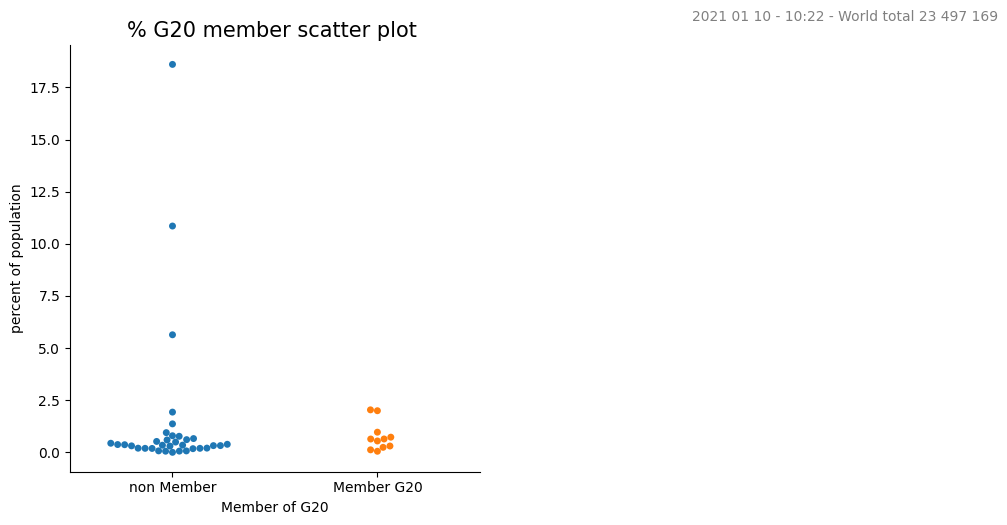

In [40]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

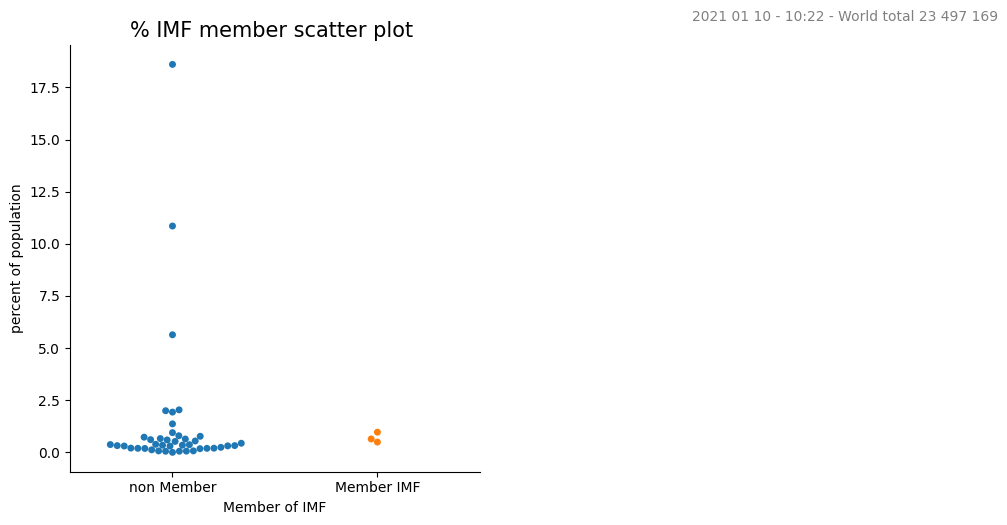

In [41]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [42]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]
europetotal_vaccinations_str = europetotal_vaccinations_str = '{:,}'.format(CountriesDataEurope.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape,europetotal_vaccinations_str)


23 497 169 (45, 3) 4 423 804


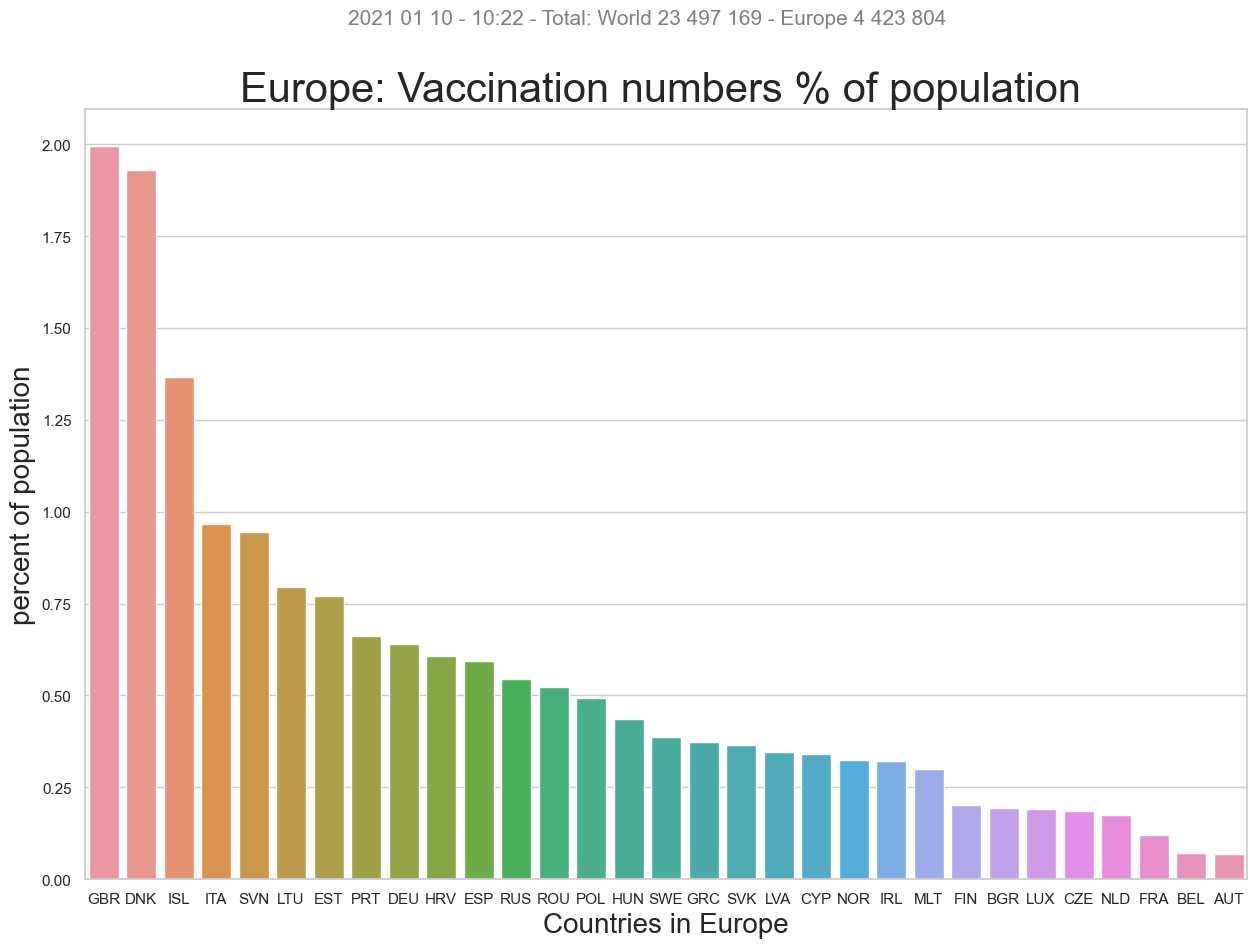

In [43]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [44]:
#CountriesDataEurope

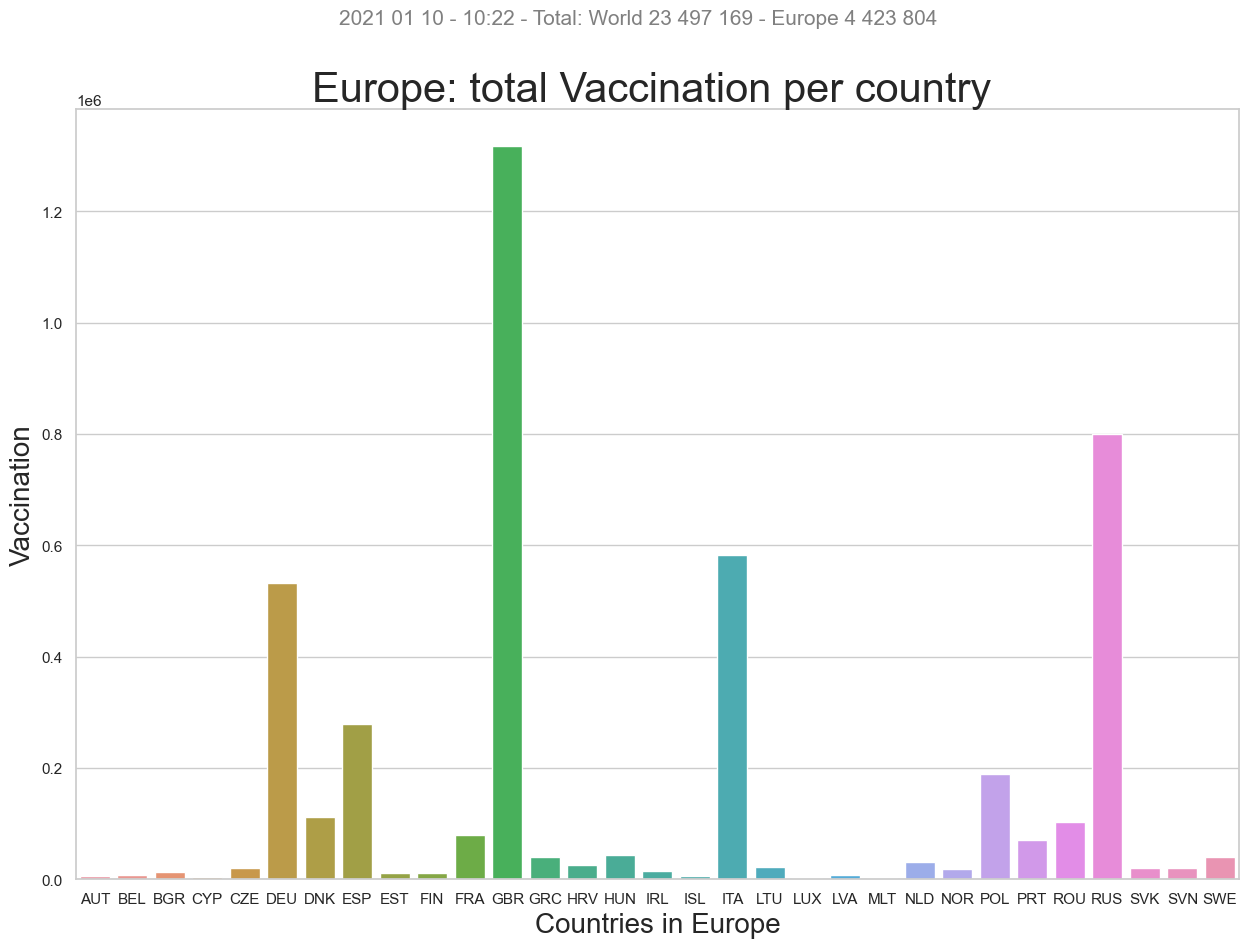

In [45]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [46]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1")  
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent","genderH_x"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'genderH_x': 'head_gender'}, inplace = True)
# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,vaccinations_population_percent,memberEU,total_vaccinations,ISO3166_1,country_x,head_gender
13,0.000000,non Member,0.0,ALB,Albania,male
37,0.000000,non Member,0.0,AND,Andorra,male
2,0.000000,non Member,0.0,ARM,Armenia,male
35,0.068111,Member in EU,6000.0,AUT,Austria,male
6,0.000000,non Member,0.0,AZE,Azerbaijan,male
1,0.069983,Member in EU,8000.0,BEL,Belgium,male
49,0.192470,Member in EU,13473.0,BGR,Bulgaria,male
9,0.000000,non Member,0.0,BIH,Bosnia and Herzegovina,male
16,0.000000,non Member,0.0,BLR,Belarus,male
30,0.000000,non Member,0.0,CHE,Switzerland,male


## All countries on continent Europe

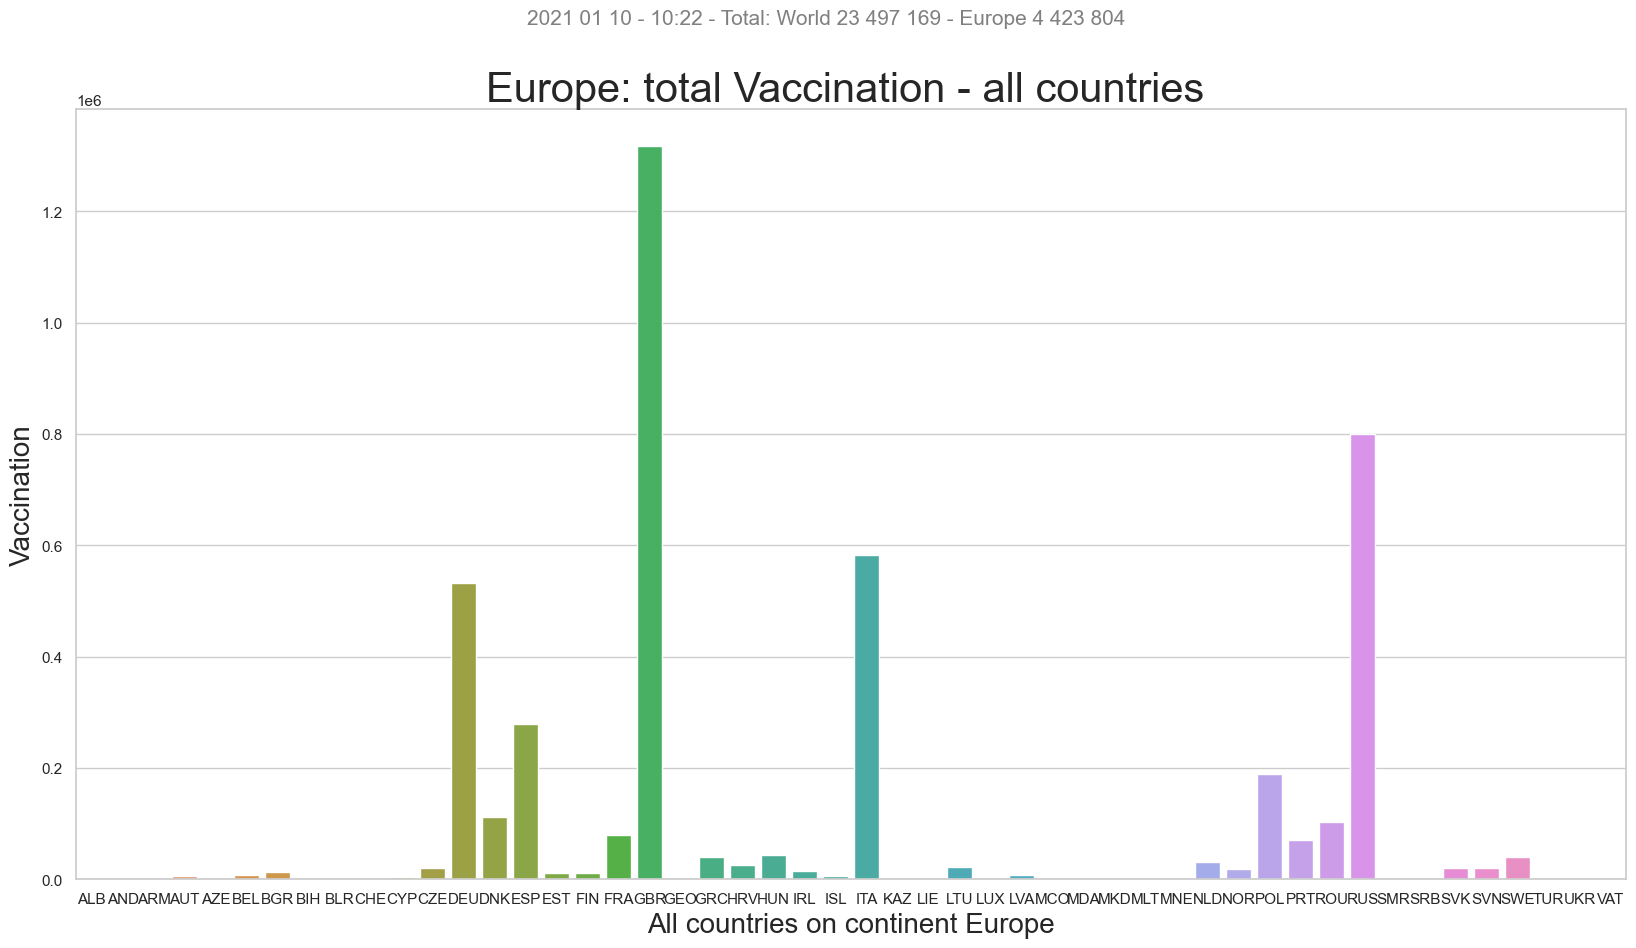

In [47]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries on continent Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [48]:
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 13 to 39
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   vaccinations_population_percent  50 non-null     float64
 1   memberEU                         50 non-null     object 
 2   total_vaccinations               50 non-null     float64
 3   ISO3166_1                        50 non-null     object 
 4   country_x                        50 non-null     object 
 5   head_gender                      50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [49]:
CountriesDataEuropeAll


,vaccinations_population_percent,memberEU,total_vaccinations,ISO3166_1,country_x,head_gender
13,0.000000,non Member,0.0,ALB,Albania,male
37,0.000000,non Member,0.0,AND,Andorra,male
2,0.000000,non Member,0.0,ARM,Armenia,male
35,0.068111,Member in EU,6000.0,AUT,Austria,male
6,0.000000,non Member,0.0,AZE,Azerbaijan,male
1,0.069983,Member in EU,8000.0,BEL,Belgium,male
49,0.192470,Member in EU,13473.0,BGR,Bulgaria,male
9,0.000000,non Member,0.0,BIH,Bosnia and Herzegovina,male
16,0.000000,non Member,0.0,BLR,Belarus,male
30,0.000000,non Member,0.0,CHE,Switzerland,male


### Countries in EU

In [50]:
#CountriesDataEuropeEU[CountriesDataEuropeEU["ISO3166_1"] == "RUS"]
#CountriesDataEuropeEU
CountriesDataEuropeAll.rename(columns = {'country_x': 'country'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'ISO3166_1': 'ISO3166-1'}, inplace = True)

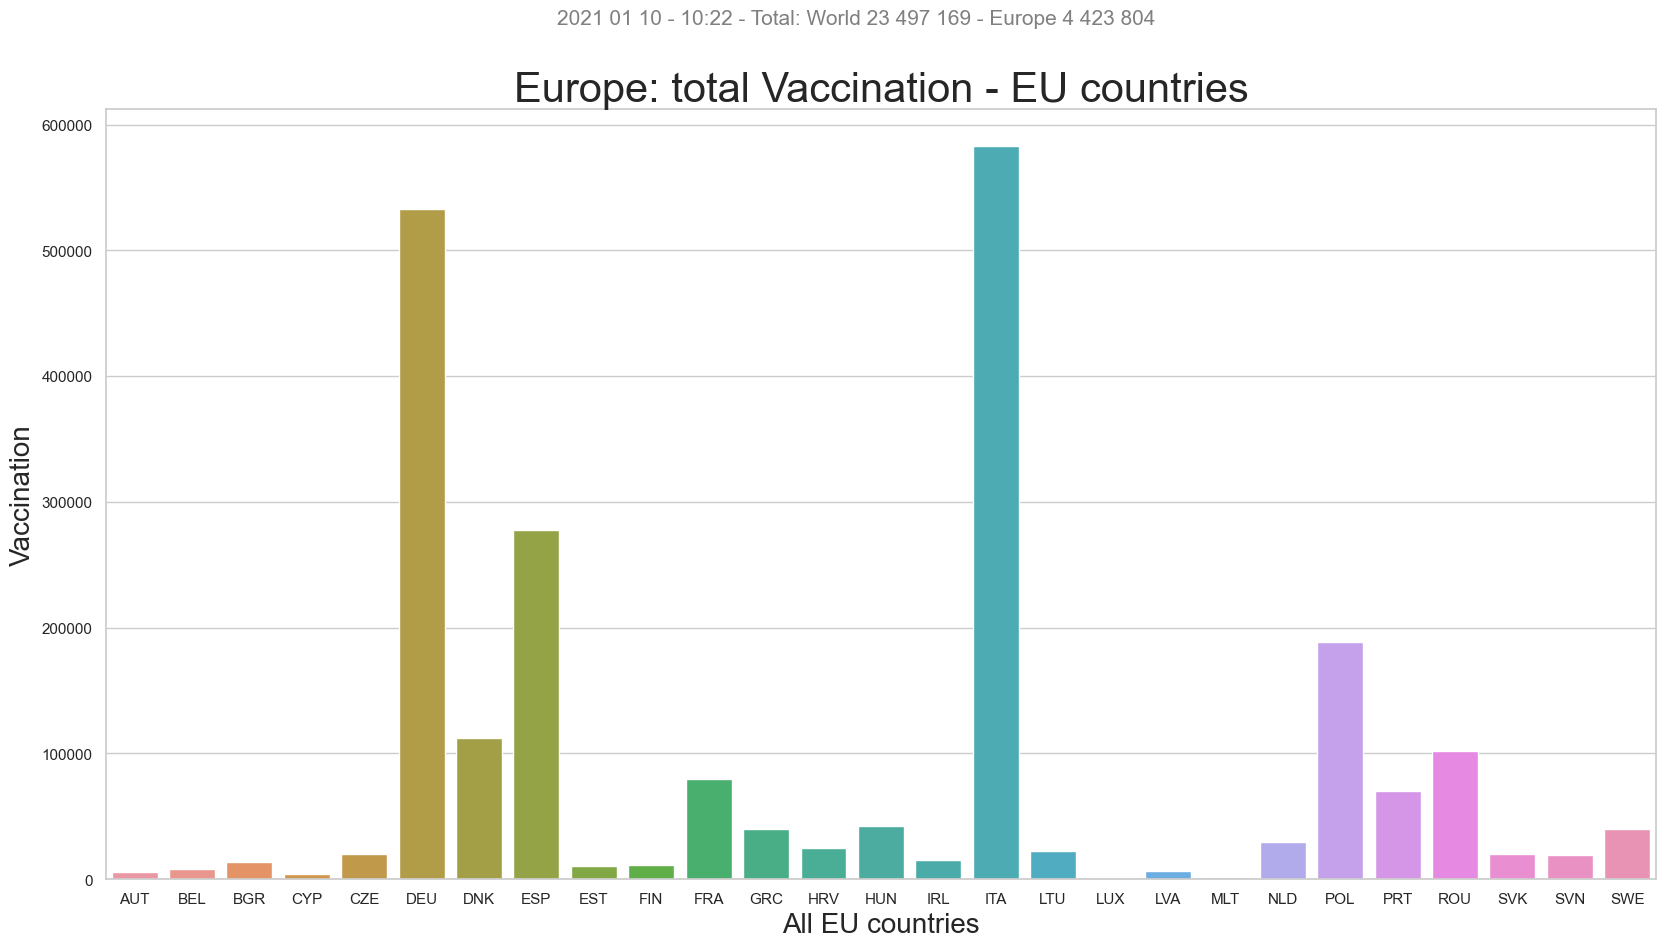

In [51]:
CountriesDataEuropeEU = CountriesDataEuropeAll[CountriesDataEuropeAll["memberEU"] == "Member in EU"]

plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "total_vaccinations", data=CountriesDataEuropeEU). \
            set_title("Europe: total Vaccination - EU countries", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
#plt.annotate('actual group', xy=(x+0.2,y), xytext=(x+0.3, 300),
#             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
#for p in ax.patches:
#    print(p)

plt.savefig("images/EU_VaccinationperCountry.png",bbox_inches="tight")
plt.show()

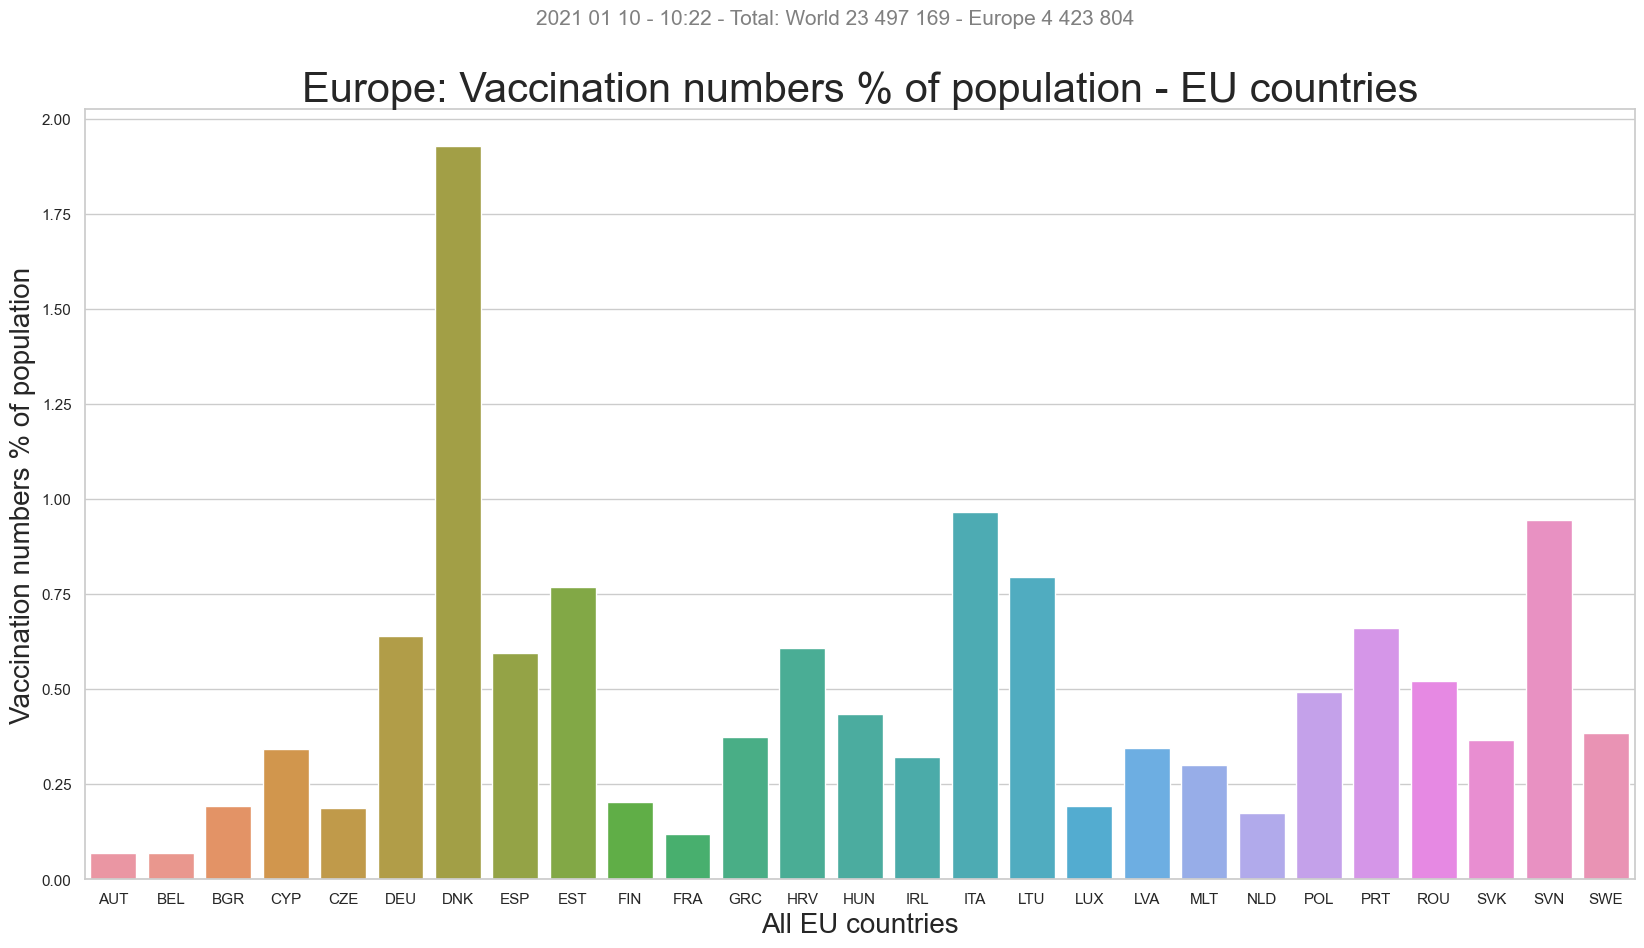

In [52]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "vaccinations_population_percent", data=CountriesDataEuropeEU). \
            set_title("Europe: Vaccination numbers % of population - EU countries", \
                      fontsize=30)
style = dict(size=10, color='gray')

plt.ylabel("Vaccination numbers % of population",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/EU_PercentVaccinationperCountry.png",bbox_inches="tight")
plt.show()

In [53]:
CountriesDataEuropeEU
#WDpopulationEuropeEU

,vaccinations_population_percent,memberEU,total_vaccinations,ISO3166-1,country,head_gender
35,0.068111,Member in EU,6000.0,AUT,Austria,male
1,0.069983,Member in EU,8000.0,BEL,Belgium,male
49,0.192470,Member in EU,13473.0,BGR,Bulgaria,male
14,0.341843,Member in EU,3901.0,CYP,Cyprus,male
19,0.186255,Member in EU,19918.0,CZE,Czech Republic,male
8,0.640869,Member in EU,532878.0,DEU,Germany,female
41,1.929261,Member in EU,112427.0,DNK,Denmark,female
27,0.594817,Member in EU,277976.0,ESP,Spain,male
21,0.769689,Member in EU,10197.0,EST,Estonia,male
36,0.202416,Member in EU,11135.0,FIN,Finland,female


### Countries in EU not delivering Vaccination statistics

In [54]:
CountriesDataEuropeAll[(CountriesDataEuropeAll["memberEU"] == "Member in EU") & \
(CountriesDataEuropeAll["total_vaccinations"] == 0 )][{"total_vaccinations","country","ISO3166-1","memberEU"}]

,total_vaccinations,ISO3166-1,country,memberEU


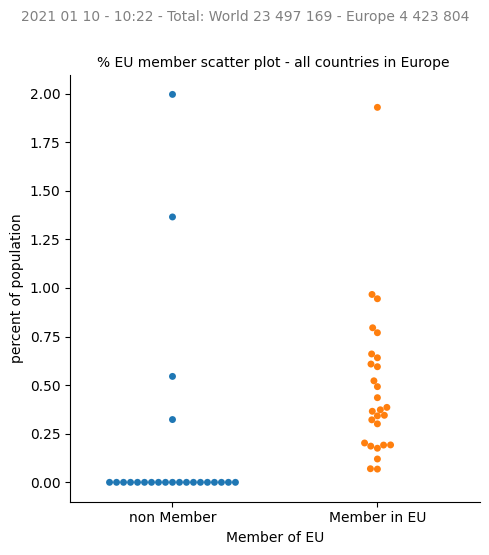

In [55]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [56]:
#CountriesDataEuropeAll["head_gender"].astype('string')  
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 13 to 39
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   vaccinations_population_percent  50 non-null     float64
 1   memberEU                         50 non-null     object 
 2   total_vaccinations               50 non-null     float64
 3   ISO3166-1                        50 non-null     object 
 4   country                          50 non-null     object 
 5   head_gender                      50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [57]:
#CountriesDataEuropeAll["vaccinations_population_percent].value_counts()

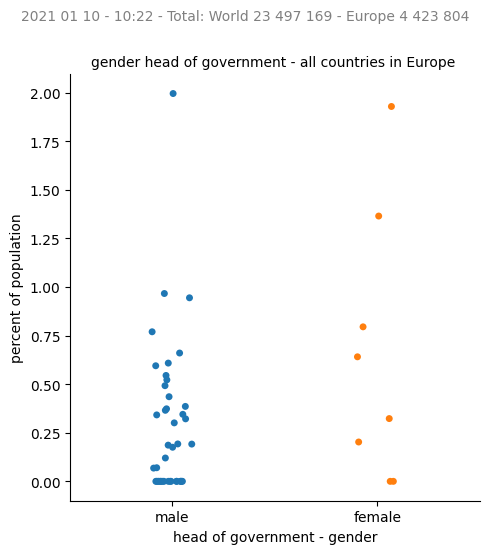

In [58]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="vaccinations_population_percent", data=CountriesDataEuropeAll)
plt.title("gender head of government - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_percent_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

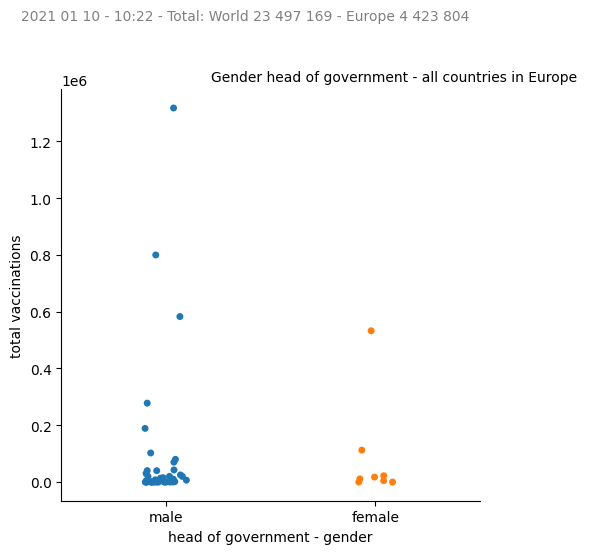

In [59]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="total_vaccinations", data=CountriesDataEuropeAll)
plt.title("Gender head of government - all countries in Europe ",fontsize=10,x=0.8)
plt.ylabel("total vaccinations",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

In [60]:
print(worldtotal_vaccinations_str, plotLatestCountries.shape, europetotal_vaccinations_str, CountriesDataEurope.shape)

23 497 169 (45, 3) 4 423 804 (31, 21)


In [61]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-10 10:23:24.598777
Time elapsed (hh:mm:ss.ms) 0:00:31.824251


In [62]:
#The Global State of Democracy Indices
#stata_democracy_indices = "https://www.idea.int/gsod-indices/sites/default/files/gsodi_pv_4.dta"
#df = pd.read_stata(stata_democracy_indices)